# Heart Failure Prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.decomposition import PCA

from scipy.spatial.distance import pdist, squareform
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier

# Introducción

El objetivo es lograr un modelo que sea capaz de predecir la mortalidad producida por ataques en el corazón, además de analizar y estudiar que factores son los más influyentes en este aspecto.

Autores: Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020)

Lluís Llull Riera, 05/02/2021

## Indice
##### Análisis de datos
##### Visualización de datos
##### Optimización
##### Aplicación de modelos
##### Conclusión

# Análisis de los datos

In [3]:
#importamos el data-set
df = pd.read_csv('data/heart_failure_clinical_records_dataset.csv')
df.rename(columns={'creatinine_phosphokinase': 'creat_phos','high_blood_pressure':'high_blood_pres'})


,age,anaemia,creat_phos,diabetes,ejection_fraction,high_blood_pres,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


#### Explicación de las variables

**age**: Edad del paciente 

**anaemia:** Falta de globulos rojos o hemoglobina (boolean) 

**creatinine_phosphokinase:** Nivel de la enzima CPK en la sangre (mcg/L)

**diabetes:** Si padece diabetes (boolean)

**ejection_fraction:** Porcentaje de sangre que expulsa el corazón con cada contracción

**high_blood_pressure:** Hypertensión (boolean)

**platelets:** Plaquetas en sangre

**serum_creatinine:** Nivel de creatinina en la sangre

**serum_sodium:** Cantidad de sodio en sangre, importante para los musculos y los nervios.

**sex:** sexo del paciente (1: Hombre, 0: Mujer)

**smoking:** Si el paciente fuma (boolean)

**time:** tiempo de seguimiento del paciente (dias)

In [89]:
print(df.shape)
df.describe()

(299, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [90]:
df.isnull().sum()
#No hay valores nulos

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [91]:
df.dtypes
#Todos los datos son numericos

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

## Visualización de datos

In [4]:
def MDS(D):                                                                                       
    # Number of points                                                                        
    n = len(D)
    # Centering matrix                                                                        
    H = np.eye(n) - np.ones((n, n))/n
    # YY^T                                                                                    
    B = -H.dot(D**2).dot(H)/2
    # Diagonalize                                                                             
    evals, evecs = np.linalg.eigh(B)
    # Sort by eigenvalue in descending order                                                  
    idx   = np.argsort(evals)[::-1]
    evals = evals[idx]
    evecs = evecs[:,idx]
    # Compute the coordinates using positive-eigenvalued components only                      
    w, = np.where(evals > 0)
    L  = np.diag(np.sqrt(evals[w]))
    V  = evecs[:,w]
    Y  = V.dot(L)
 
    return Y, evals

El porcentaje de muertos es: 32.11%


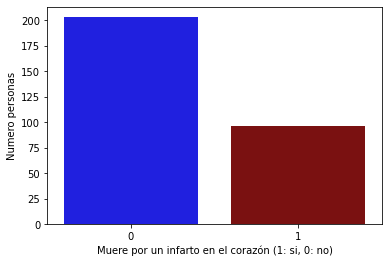

In [93]:
sns.countplot(x="DEATH_EVENT",data=df, palette={0:'blue', 1:'darkred'})
plt.xlabel('Muere por un infarto en el corazón (1: si, 0: no)')
plt.ylabel('Numero personas')
porc= (len(df[df.DEATH_EVENT==1]) / len(df.DEATH_EVENT)) * 100
print('El porcentaje de muertos es: {:.2f}%'.format(porc))

Comprovamos la relación entre las variables de X a y para eliminar el 'black noise'


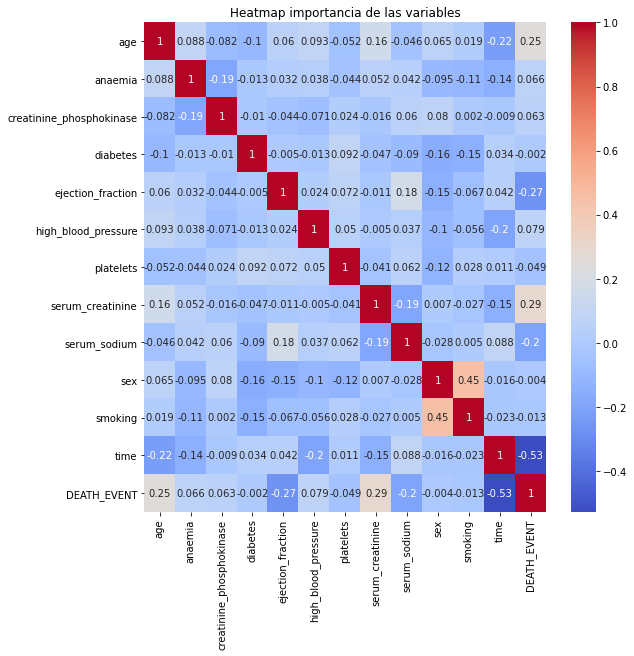

In [5]:
print("Comprovamos la relación entre las variables de X a y para eliminar el 'black noise'")
correlation_matrix =df.corr().round(3)
fig, ax = plt.subplots(figsize =(9,9))
sns.heatmap(data=correlation_matrix, ax=ax, annot = True, cmap='coolwarm')
plt.title('Heatmap importancia de las variables');

In [6]:
##Creamos una X auxiliar con solo valores con relación >15%
Features =['creatinine_phosphokinase','age','serum_sodium','time','ejection_fraction','serum_creatinine']
x_aux=df[Features]

Comprovamos la relación entre las variables de X a X para eliminar el 'white noise'
No existe ningua correlación cno más del 80%, no hay white noise.


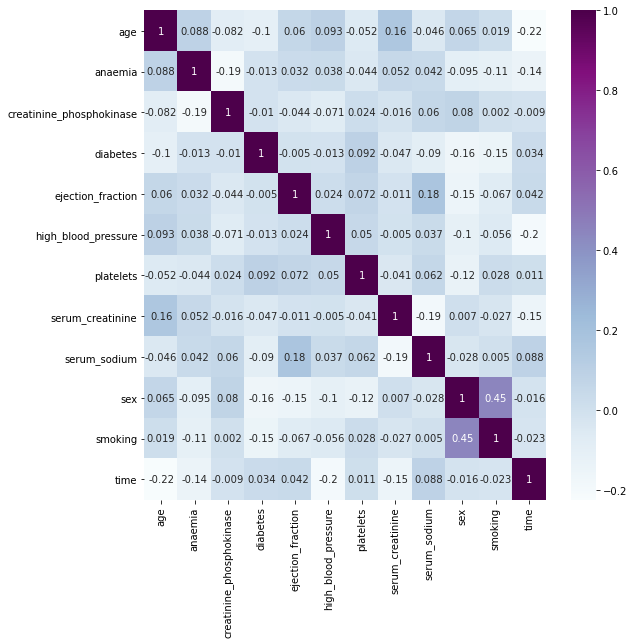

In [96]:
print("Comprovamos la relación entre las variables de X a X para eliminar el 'white noise'")
correlation_matrix =df.drop('DEATH_EVENT',axis=1).corr().round(3)
fig, ax = plt.subplots(figsize =(9,9))
sns.heatmap(data=correlation_matrix, ax=ax, annot = True, cmap='BuPu')

print('No existe ningua correlación cno más del 80%, no hay white noise.')

In [7]:
x=df.drop('DEATH_EVENT',axis=1)
y=df['DEATH_EVENT']

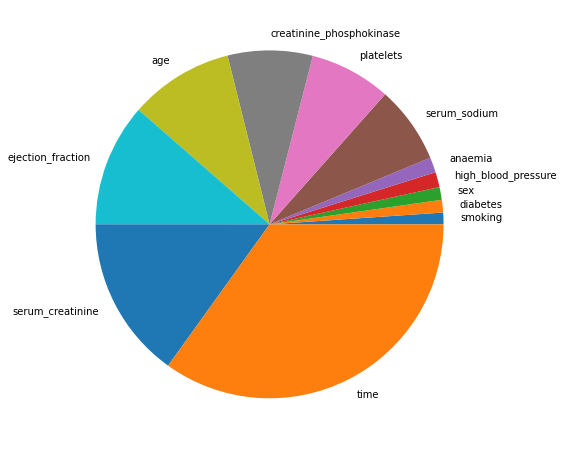

In [101]:
##Comprovamos que featuers son las más importantes
clasificacion = RandomForestClassifier()
clasificacion.fit(x,y)
features = x.columns
importancia = pd.DataFrame()
importancia['Features'] = x.columns
importancia['Importance'] = clasificacion.feature_importances_
importancia = importancia.sort_values(by=['Importance'],ascending=True)

labels = importancia['Features']
values = importancia['Importance']

plt.figure(figsize=(8,8))
plt.pie(values,labels=labels)
plt.show()

In [8]:
#Escalamos las variables
scaler = StandardScaler()
x = scaler.fit_transform(x)

#### Reducción de dimensionalidad

rojos: mueren, azules:viven


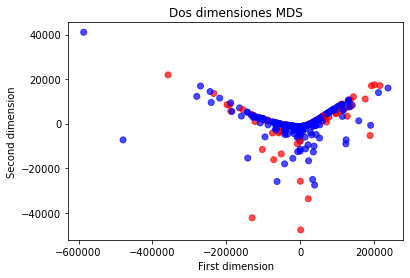

In [12]:
dissimilarities = squareform(pdist(df.to_numpy(), 'cityblock')) # Manhattan
coords, eigenvals = MDS(dissimilarities)

colors={0:'blue', 1:'red'}

plt.scatter(x = coords[:, 0], y = coords[:, 1], 
            c = df['DEATH_EVENT'].apply(lambda x: colors[x])
            , alpha=0.7)
plt.xlabel("First dimension")
plt.ylabel("Second dimension")
plt.title('Dos dimensiones MDS')
print('rojos: mueren, azules:viven')

In [22]:
projected = PCA(n_components=2).fit_transform(x)


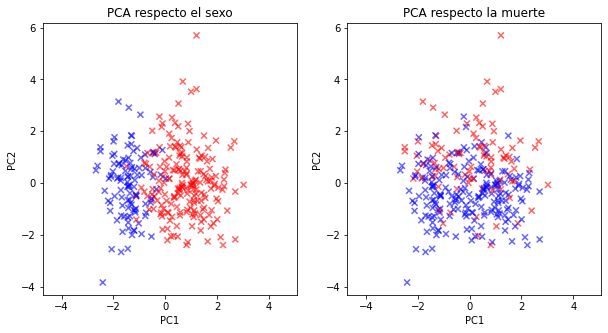

In [23]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].scatter(projected[:,0],projected[:,1], marker='x', alpha=0.6, c=df['sex'].apply(lambda x: colors[x]))
ax[1].scatter(projected[:,0],projected[:,1], marker='x', alpha=0.6, c=df['DEATH_EVENT'].apply(lambda x: colors[x]))

ax[0].set_xlabel('PC1') , ax[0].set_ylabel('PC2')
ax[1].set_xlabel('PC1') , ax[1].set_ylabel('PC2')

ax[0].axis('equal'), ax[1].axis('equal')

ax[0].set_title('PCA respecto el sexo'), ax[1].set_title('PCA respecto la muerte')
plt.show()

### Que features son importantes?

<ipython-input-40-acaa208d9af1>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax=ax)


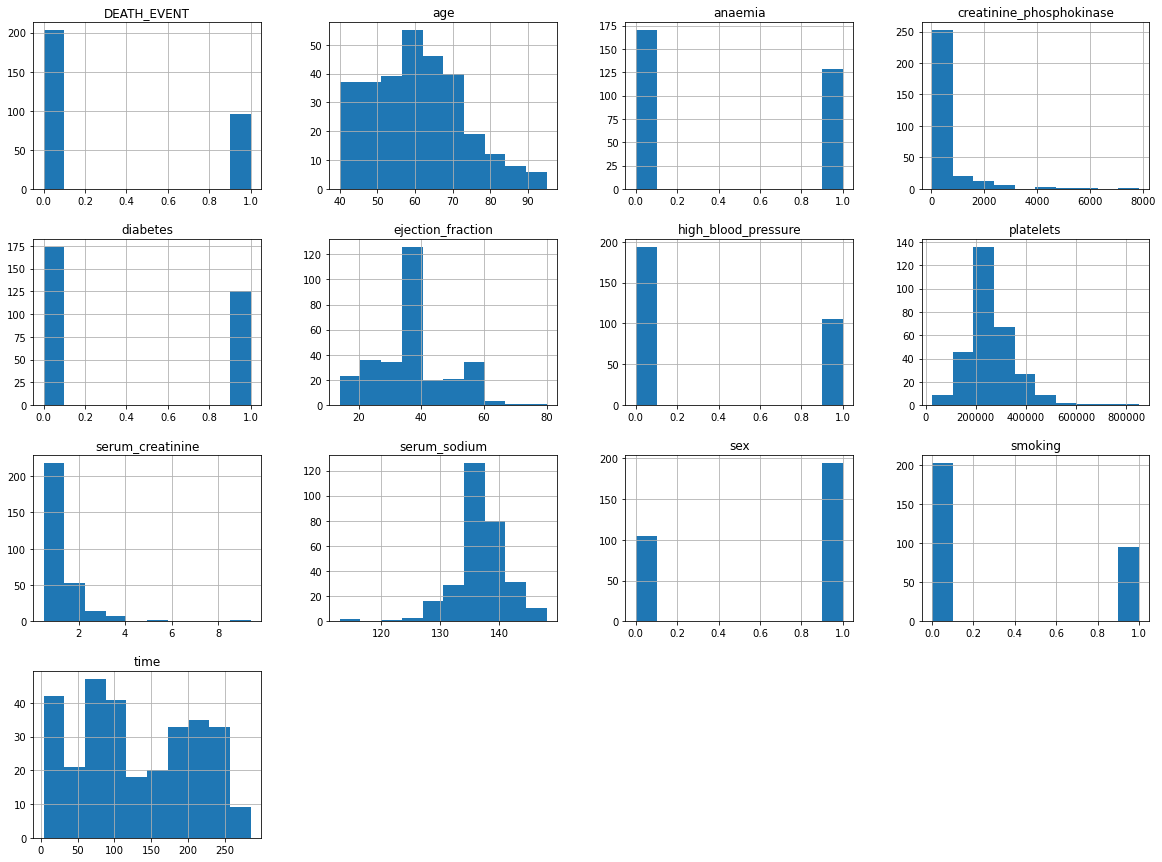

In [40]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df.hist(ax=ax)
plt.show();

### Optimización de datos

In [41]:
## Dividimos los datos en "train" y "test"
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state=1)
print('train shape:',X_train.shape)
print('test shape:', X_test.shape)

train shape: (224, 12)
test shape: (75, 12)


In [43]:
resultados_accuracy=[] #Array para comparar accuracy
resultados_csv=[] #Array para comparar cross_validation

## Aplicación de diferentes modelos

### Regresion Logística


In [44]:
reg_log =LogisticRegression(random_state=1)
reg_log.fit(X_train, Y_train)
reg_log_pred = reg_log.predict(X_test)
reg_log_acc = metrics.accuracy_score(Y_test, reg_log_pred)

In [45]:
prediccion_train = reg_log.predict(X_test)
print('Matriz de confusión')
confusion_matrix(Y_test.values, prediccion_train)

Matriz de confusión


array([[50,  5],
       [ 4, 16]], dtype=int64)

In [46]:
print('Accuracy de Logistic Regresion es',100*reg_log_acc,'%')
resultados_accuracy.append({'Logistic Regresion':100*reg_log_acc})

Accuracy de Logistic Regresion es 88.0 %


In [62]:
#CSV 
scores = cross_val_score(reg_log, X_train, Y_train,
                             scoring = "accuracy", cv = 10)
print('CSV:',scores.mean())
resultados_csv.append({'Logistic Regresion':scores.mean()})

CSV: 0.7774703557312252


---
### KNN

In [48]:
#comprovamos con cuantos vecinos tiene mayor accuracy
for k in range(1,20):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    knn_pred = knn.predict(X_test)
    knn_acc = metrics.accuracy_score(Y_test, knn_pred)
    print(k,'vecinos Accuracy:',knn_acc)

1 vecinos Accuracy: 0.7466666666666667
2 vecinos Accuracy: 0.76
3 vecinos Accuracy: 0.8133333333333334
4 vecinos Accuracy: 0.7733333333333333
5 vecinos Accuracy: 0.8133333333333334
6 vecinos Accuracy: 0.7866666666666666
7 vecinos Accuracy: 0.7866666666666666
8 vecinos Accuracy: 0.7866666666666666
9 vecinos Accuracy: 0.8
10 vecinos Accuracy: 0.7866666666666666
11 vecinos Accuracy: 0.8133333333333334
12 vecinos Accuracy: 0.8
13 vecinos Accuracy: 0.8
14 vecinos Accuracy: 0.7866666666666666
15 vecinos Accuracy: 0.8
16 vecinos Accuracy: 0.8
17 vecinos Accuracy: 0.8266666666666667
18 vecinos Accuracy: 0.7866666666666666
19 vecinos Accuracy: 0.8266666666666667


In [49]:
kn = KNeighborsClassifier(n_neighbors=9)
kn.fit(X_train, Y_train)
kn_pred = kn.predict(X_test)
kn_acc = metrics.accuracy_score(Y_test, kn_pred)
print('Accuracy de KNN con 9 vecinos es',kn_acc*100)
resultados_accuracy.append({'KNN':100*kn_acc})

Accuracy de KNN con 9 vecinos es 80.0


In [50]:
prediccion = kn.predict(X_test)
print('Matriz de confusión')
confusion_matrix(Y_test.values, prediccion)

Matriz de confusión


array([[53,  2],
       [13,  7]], dtype=int64)

In [63]:
##CSV
scores = cross_val_score(kn, X_train, Y_train,
                             scoring = "accuracy", cv = 10)
print('CSV',scores.mean())
resultados_csv.append({'KNN':scores.mean()})

CSV 0.7369565217391304


---
### SVM

In [54]:
#linear 
svm_fin=SVC(random_state=1, kernel='linear', C=2)
svm_fin= svm_fin.fit(X_train, Y_train)
svm_pred = svm_fin.predict(X_test)
svm_acc_linear = metrics.accuracy_score(Y_test, svm_pred)
print('Accuracy de SVM linear es',svm_acc_linear*100)

Accuracy de SVM linear es 88.0


In [53]:
#rbf
svm=SVC(random_state=1, kernel='rbf', C=2)
svm= svm.fit(X_train, Y_train)
svm_pred = svm.predict(X_test)
svm_acc_rbf = metrics.accuracy_score(Y_test, svm_pred)
print('Accuracy de SVM rbf es',svm_acc_rbf*100)

Accuracy de SVM rbf es 86.66666666666667


In [55]:
#poly
svm=SVC(random_state=1, kernel='poly', C=2)
svm= svm.fit(X_train, Y_train)
svm_pred = svm.predict(X_test)
svm_acc_poly = metrics.accuracy_score(Y_test, svm_pred)
print('Accuracy de SVM poly es',svm_acc_poly*100)

Accuracy de SVM poly es 88.0


In [56]:
resultados_accuracy.append({'SVM':100*svm_acc_linear})

In [57]:
prediccion_train = svm.predict(X_test)
print('Matriz de confusión')
confusion_matrix(Y_test.values, prediccion_train)

Matriz de confusión


array([[53,  2],
       [ 7, 13]], dtype=int64)

In [64]:
##CSV
scores = cross_val_score(svm_fin, X_train, Y_train,
                             scoring = "accuracy", cv = 10)
print('CSV',scores.mean())
resultados_csv.append({'SVM':scores.mean()})

CSV 0.7774703557312252


---
### Arbol de decisión


In [31]:
arbol = tree.DecisionTreeClassifier(random_state=1,criterion='entropy')
arbol.fit(X_train, Y_train)
a=metrics.accuracy_score(Y_train, arbol.predict(X_train))
b=metrics.accuracy_score(Y_test, arbol.predict(X_test))
print('Train set:',a)
print('Test set:',b)




Train set: 1.0
Test set: 0.7466666666666667


In [66]:
arbol = tree.DecisionTreeClassifier(random_state=1,criterion='entropy',max_leaf_nodes=4)
arbol.fit(X_train, Y_train)
a=metrics.accuracy_score(Y_train, arbol.predict(X_train))
b=metrics.accuracy_score(Y_test, arbol.predict(X_test))
print('Train set:',a)
print('Test set:',b)
print('Matriz de confusión')
arbol_pred = arbol.predict(X_test)
print(confusion_matrix(Y_test.values, arbol_pred))

resultados_accuracy.append({'Arbol de decisión':100*b})

Train set: 0.84375
Test set: 0.7733333333333333
Matriz de confusión
[[46  9]
 [ 8 12]]


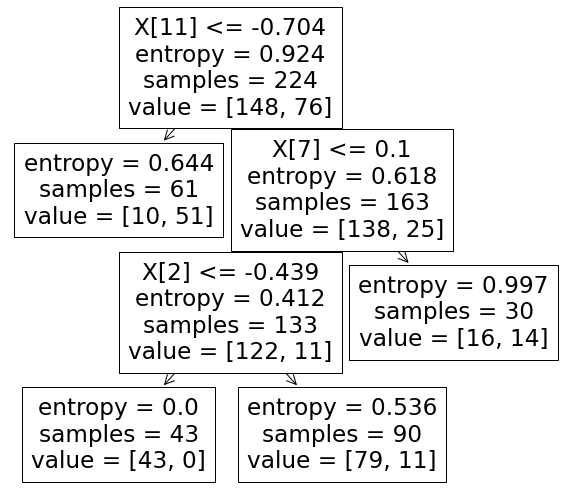

In [67]:

fig, ax = plt.subplots(1, 1, figsize = (10, 9))
tree.plot_tree(arbol, impurity = True,);

In [68]:
##CSV
scores = cross_val_score(arbol, X_train, Y_train,
                             scoring = "accuracy", cv = 10)
print('CSV',scores.mean())
resultados_csv.append({'Arbol de decisión':scores.mean()})

CSV 0.8254940711462451


---
###  Random Forest

In [70]:
bosque = RandomForestClassifier(criterion = 'entropy',
                                oob_score = True,
                                random_state=1)
bosque.fit(X_train, Y_train)
bosque_pred= bosque.predict(X_test)
bosque_acc = metrics.accuracy_score(Y_test,bosque_pred)

In [71]:
print('Accuracy de Random Forest:',bosque_acc)
print('OOB error: {}'.format(1 - bosque.oob_score_))
resultados_accuracy.append({'Random Forest':100*bosque_acc})

Accuracy de Random Forest: 0.8933333333333333
OOB error: 0.1651785714285714


In [72]:
print('Matriz de confusión')
confusion_matrix(Y_test.values, bosque_pred)

Matriz de confusión


array([[53,  2],
       [ 6, 14]], dtype=int64)

In [73]:
##CSV
scores = cross_val_score(bosque, X_train, Y_train,
                             scoring = "accuracy", cv = 10)
print('CSV',scores.mean())
resultados_csv.append({'Random Forest':scores.mean()})

CSV 0.808498023715415


## Resultados y conclusión

In [38]:
resultados_accuracy

[{'Logistic Regresion': 88.0},
 {'KNN': 80.0},
 {'Arbol de decisión': 77.33333333333333},
 {'Random Forest': 89.33333333333333}]

In [74]:
resultados_csv

[{'Logistic Regresion': -0.2225296442687747},
 {'KNN': -0.26304347826086955},
 {'Logistic Regresion': 0.7774703557312252},
 {'KNN': 0.7369565217391304},
 {'SVM': 0.7774703557312252},
 {'Arbol de decisión': 0.8254940711462451},
 {'Random Forest': 0.808498023715415}]

---

### Entrenamos modelos con menos features

In [40]:
##['age','serum_sodium','time','ejection_fraction','serum_creatinine']
X_train_aux, X_test_aux, Y_train_aux, Y_test_aux = train_test_split(x_aux, y, test_size = 0.25, random_state=1)

In [42]:
## La Accuracy disminuye
bosque = RandomForestClassifier(criterion = 'entropy',
                                oob_score = True,
                                random_state=1)
bosque.fit(X_train_aux, Y_train_aux)
bosque_pred= bosque.predict(X_test_aux)
bosque_acc = metrics.accuracy_score(Y_test,bosque_pred)
print('Accuracy de SVM linear es',bosque_acc*100)

Accuracy de SVM linear es 86.66666666666667


In [41]:
## La Accuracy no cambia
reg_log =LogisticRegression(random_state=1)
reg_log.fit(X_train_aux, Y_train_aux)
reg_log_pred = reg_log.predict(X_test_aux)
reg_log_acc = metrics.accuracy_score(Y_test_aux, reg_log_pred)
print('Accuracy de SVM linear es',reg_log_acc*100)

Accuracy de SVM linear es 88.0


In [44]:
## La Accuracy augmenta
kn = KNeighborsClassifier(n_neighbors=9)
kn.fit(X_train_aux, Y_train_aux)
kn_pred = kn.predict(X_test_aux)
kn_acc = metrics.accuracy_score(Y_test_aux, kn_pred)
print('Accuracy de KNN con 9 vecinos es',kn_acc*100)
resultados_accuracy.append({'KNN':100*kn_acc})

Accuracy de KNN con 9 vecinos es 85.33333333333334
